<a href="https://colab.research.google.com/github/SHRUTIKOLHE03/Data-Science/blob/main/Pan_card_Tampering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Import Libraries

!pip install scikit-image

from skimage.metrics import structural_similarity
import cv2
import requests
from PIL import Image
import imutils


In [4]:
# Create a directory
!mkdir pan_card_tampering
!mkdir pan_card_tampering/images

In [8]:
# Create a varible of original and Tampered
original=Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg',stream=True).raw)
tampered=Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png',stream=True).raw)

In [11]:
# Check the file format and size of the image

print("Original image format: ",original.format)
print("Original Image size: ",original.size)

print("Tampered image format: ",tampered.format)
print("Tampered image size: ",tampered.size)

Original image format:  JPEG
Original Image size:  (1200, 800)
Tampered image format:  PNG
Tampered image size:  (282, 179)


In [12]:
# Resize the both the images to same size
original=original.resize((250,160))
print(original.size)
tampered=tampered.resize((250,160))
print(tampered.size)

original.save("pan_card_tampering/images/original.png")
tampered.save("pan_card_tampering/images/tampered.png")

(250, 160)
(250, 160)


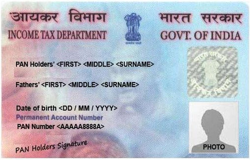

In [15]:
#Display images:
original

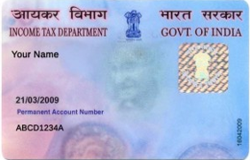

In [16]:
tampered

In [17]:
# Load these images using cv2
original=cv2.imread("pan_card_tampering/images/original.png")
tampered=cv2.imread("pan_card_tampering/images/tampered.png")

In [18]:
# Convert these images to grey scale as in image processing it help us identify edges
original_gray=cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)
tampered_gray=cv2.cvtColor(tampered,cv2.COLOR_BGR2GRAY)

In [19]:
# Similarity score:
(score, diff)=structural_similarity(original_gray,tampered_gray,full=True)
diff=(diff*255).astype("uint8")
print("Similarity of the images: ",score)

Similarity of the images:  0.31686135690489126


In [20]:
# Calculate the threshold and contours
thresh=cv2.threshold(diff,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts=cv2.findContours(diff.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts=imutils.grab_contours(cnts)

In [21]:
# Create a loop over contours
for c in cnts:
  (x,y,w,h)=cv2.boundingRect(c)
  cv2.rectangle(original,(x,y),(x+w,y+h),(0,0,255),2)
  cv2.rectangle(tampered,(x,y),(x+w,y+h),(0,0,255),2)

Original Image format


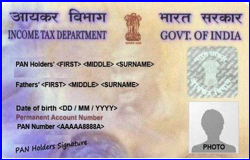

In [22]:
#Display the original Image with the contour
print("Original Image format")
Image.fromarray(original)

Original Image format


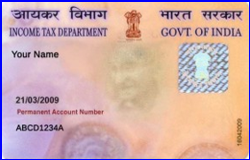

In [23]:
#Display the tampered Image with the contour
print("Original Image format")
Image.fromarray(tampered)

Different Images


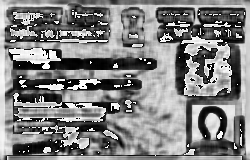

In [24]:
# Display image difference
#Black Portion: Difference
print("Different Images")
Image.fromarray(diff)

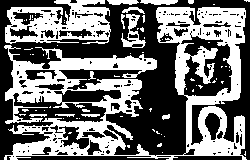

In [25]:
# Find the threshold with white
Image.fromarray(thresh)